In [ ]:
### In this NoteBook we going to will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous MNIST dataset.

In [ ]:
# MNIST Digit Classification

In [ ]:
# importing the packaages
import tensorflow as tf

!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml
# TODO: ENTER YOUR API KEY HERE!!
COMET_API_KEY = "YOUR_COMET_API_KEY"

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0
assert COMET_API_KEY != "", "Please insert your Comet API Key"

/usr/local/lib/python3.10/dist-packages/comet_ml/error_tracking/shutdown.py:22: SentryHubDeprecationWarning: `sentry_sdk.Hub` is deprecated and will be removed in a future major release. Please consult our 1.x to 2.x migration guide for details on how to migrate `Hub` usage to the new API: https://docs.sentry.io/platforms/python/migration/1.x-to-2.x
  client = sentry_sdk.Hub.current.client


In [ ]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="6S191lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


In [ ]:
# 1.1 MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1) / 255).astype(np.float32)
train_labels = train_labels.astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1) / 255).astype(np.float32)
test_labels = test_labels.astype(np.int64)

x_train = train_images[:-10000]
y_train = train_labels[:-10000]

x_val = train_images[-10000:]
y_val = train_labels[-10000:]

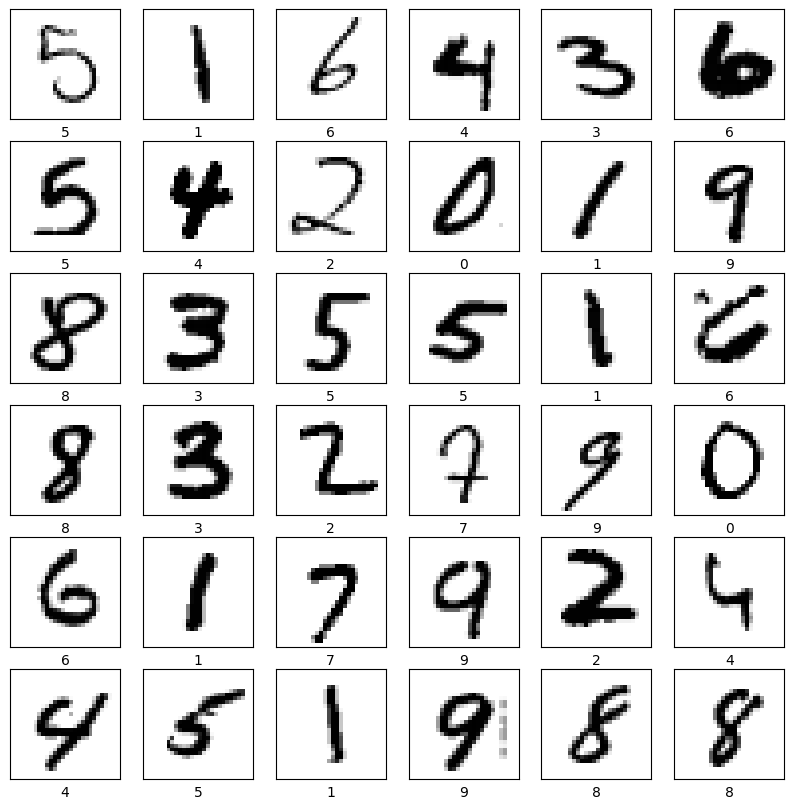

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(50000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)

In [ ]:
# 1.2 Neural Network for Handwritten Digit Classification

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation='relu'),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      # [TODO Dense layer to output classification probabilities]
      tf.keras.layers.Dense(10, activation='softmax')

  ])
  return fc_model

model = build_fc_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy])

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 10

history = model.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(x_val, y_val),
          )
comet_model_1.end()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0028 - sparse_categorical_accuracy: 0.9993 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9904
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0418 - val_sparse_categorical_accuracy: 0.9896
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0344 - val_sparse_categorical_accuracy: 0.9909
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9909
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0010 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0382 - val_sparse_categorical_accuracy: 0.9905
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0785e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0372 - val_sparse_categorical_accuracy: 0.9917


In [ ]:
history.history

{'loss': [0.003018008777871728,
  0.0023051667958498,
  0.0016524555394425988,
  0.0014135054079815745,
  0.0013341937446966767,
  0.0008470904431305826,
  0.0005739744519814849,
  0.0005362378433346748,
  0.00035675076651386917,
  0.0003118906170129776],
 'sparse_categorical_accuracy': [0.999239981174469,
  0.9996200203895569,
  0.9997000098228455,
  0.9997400045394897,
  0.9998000264167786,
  0.9998800158500671,
  0.9999399781227112,
  0.9999200105667114,
  0.9999799728393555,
  0.9999799728393555],
 'val_loss': [0.03491795063018799,
  0.04180605709552765,
  0.03443058952689171,
  0.03588879480957985,
  0.03819884732365608,
  0.03720486909151077,
  0.0400378592312336,
  0.03831981495022774,
  0.03914342820644379,
  0.04008278250694275],
 'val_sparse_categorical_accuracy': [0.9904000163078308,
  0.9896000027656555,
  0.9908999800682068,
  0.9908999800682068,
  0.9904999732971191,
  0.9916999936103821,
  0.9902999997138977,
  0.9914000034332275,
  0.9908000230789185,
  0.99150002002716

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

 19/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9855 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1162 - sparse_categorical_accuracy: 0.9767
Test loss: 0.09653718769550323
Test accuracy: 0.980400025844574


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_images[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predictions shape: (3, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

          tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(filters=36,kernel_size=(3,3),activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='sigmoid'),
        # output
          tf.keras.layers.Dense(10),
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 64ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 900)               0         
                                                                 
 d

In [ ]:
comet_ml.init(project_name="6.s191lab2_part1_CNN")
comet_model_2 = comet_ml.Experiment()

cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # TODO

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, tensorboard, keras.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : amber_cabinet_1715
COMET INFO:     url                   : https://www.co

In [ ]:
cnn_model.fit(train_images, train_labels, batch_size=64, epochs=5)
comet_model_2.end() ## uncomment this line to end the comet experiment

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 12.4793 - accuracy: 0.0904
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 12.4793 - accuracy: 0.0904
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 12.4793 - accuracy: 0.0904
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 12.4793 - accuracy: 0.0904
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 12.4793 - accuracy: 0.0904


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : faithful_depot_1055
COMET INFO:     url                   : https://www.comet.com/akshaybitlingu/6-s191lab2-part1-cnn/ae189865ce404cc587d5a3bf5b94e98a
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, tensorboard, keras.


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)

print('Test accuracy:', test_acc)

157/157 [==============================] - 1s 4ms/step - loss: 12.4957 - accuracy: 0.0892
Test accuracy: 0.08919999748468399


In [ ]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions[0]

array([-0.42882642, -0.9178745 , -0.9045343 , -1.0929677 , -0.24980214,
       11.344839  , -0.6062677 ,  2.1175668 , -0.648404  ,  4.108077  ],
      dtype=float32)

In [ ]:
## Convolutional Neural Network (CNN) for handwritten digit classification

In [ ]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3),activation='relu'),
      tf.keras.layers.MacPool2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3),activation='relu'),
      tf.keras.layers.MacPool2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='softmax'),
      tf.keras.layers.Dense(10)
  ])
  return cnn_model

cnn_model = build_cnn_model()